In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vowel.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-Hot Encoding para a saída
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Dividir em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [219]:
def initialize_weights(input_dim, hidden_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * 0.01
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

In [220]:
# Função ReLU
def relu(z):
    return np.maximum(0, z)

# Derivada da ReLU
def relu_derivative(z):
    return (z > 0).astype(float)


def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)


In [221]:

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return A1, A2

def compute_cost(A2, Y, W1, W2, lambda_):
    m = Y.shape[0]
    logprobs = -np.log(A2[np.arange(m), np.argmax(Y, axis=1)])
    cost = np.sum(logprobs) / m

    # Regularização L2
    cost += (lambda_ / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))

    return cost

def backward_propagation(X, Y, A1, A2, W1, W2, learning_rate, beta, lambda_):
    m = X.shape[0]

    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m + (lambda_ / m) * W2
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m + (lambda_ / m) * W1
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2


In [222]:

def train(X_train, y_train, X_val, y_val, hidden_dim=50, epochs=100000, batch_size=64, learning_rate=0.001, beta=0.9, lambda_=0.01):
    input_dim = X_train.shape[1]
    output_dim = y_train.shape[1]

    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)

    train_costs = []
    val_costs = []

    for epoch in range(epochs):
        permutation = np.random.permutation(X_train.shape[0])
        X_shuffled = X_train[permutation]
        y_shuffled = y_train[permutation]

        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            A1, A2 = forward_propagation(X_batch, W1, b1, W2, b2)
            cost = compute_cost(A2, y_batch, W1, W2, lambda_)
            dW1, db1, dW2, db2 = backward_propagation(X_batch, y_batch, A1, A2, W1, W2, learning_rate, beta, lambda_)

            # Atualizar pesos com momentum
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2

        # Calcular custo de treinamento e validação
        A1_train, A2_train = forward_propagation(X_train, W1, b1, W2, b2)
        train_cost = compute_cost(A2_train, y_train, W1, W2, lambda_)
        A1_val, A2_val = forward_propagation(X_val, W1, b1, W2, b2)
        val_cost = compute_cost(A2_val, y_val, W1, W2, lambda_)

        train_costs.append(train_cost)
        val_costs.append(val_cost)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Train Cost: {train_cost}, Validation Cost: {val_cost}')

    return W1, b1, W2, b2, train_costs, val_costs

In [223]:
def predict(X, W1, b1, W2, b2):
    _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

def accuracy(predictions, labels):
    return np.mean(predictions == np.argmax(labels, axis=1)) * 100

# Treinamento
W1, b1, W2, b2, train_costs, val_costs = train(X_train, y_train, X_val, y_val)




Epoch 0, Train Cost: 2.3978716103370243, Validation Cost: 2.397799785596727
Epoch 100, Train Cost: 2.3963277456050704, Validation Cost: 2.399002719205694
Epoch 200, Train Cost: 2.3947918779269153, Validation Cost: 2.4000243425126766
Epoch 300, Train Cost: 2.3931222823924156, Validation Cost: 2.4005838122780188
Epoch 400, Train Cost: 2.3910492073854175, Validation Cost: 2.4006563864505868
Epoch 500, Train Cost: 2.388279301003817, Validation Cost: 2.3998279035384993
Epoch 600, Train Cost: 2.384317944331456, Validation Cost: 2.3977844811468256
Epoch 700, Train Cost: 2.3784448917651746, Validation Cost: 2.393817543683943
Epoch 800, Train Cost: 2.369616738260694, Validation Cost: 2.3867518171217412
Epoch 900, Train Cost: 2.356357520542885, Validation Cost: 2.375259681484827
Epoch 1000, Train Cost: 2.3364518323112193, Validation Cost: 2.3571450142390233
Epoch 1100, Train Cost: 2.30726951645342, Validation Cost: 2.3299299101214275
Epoch 1200, Train Cost: 2.2667327972202855, Validation Cost: 2

In [224]:
# Avaliação
train_predictions = predict(X_train, W1, b1, W2, b2)
val_predictions = predict(X_val, W1, b1, W2, b2)
test_predictions = predict(X_test, W1, b1, W2, b2)

train_acc = accuracy(train_predictions, y_train)
val_acc = accuracy(val_predictions, y_val)
test_acc = accuracy(test_predictions, y_test)

print(f'Train Accuracy: {train_acc}%')
print(f'Validation Accuracy: {val_acc}%')
print(f'Test Accuracy: {test_acc}%')


Train Accuracy: 100.0%
Validation Accuracy: 90.9090909090909%
Test Accuracy: 92.92929292929293%


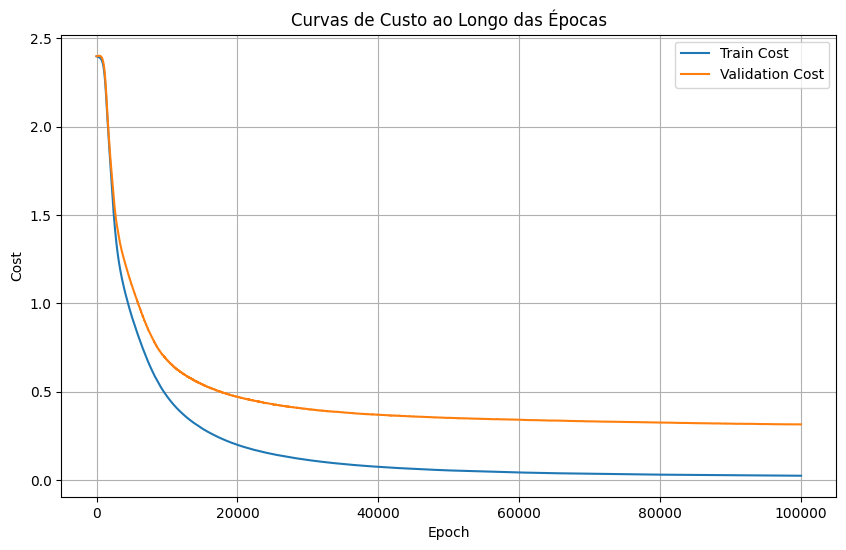

In [225]:
# Plotar as curvas de custo
plt.figure(figsize=(10, 6))
plt.plot(train_costs, label='Train Cost')
plt.plot(val_costs, label='Validation Cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Curvas de Custo ao Longo das Épocas')
plt.legend()
plt.grid(True)
plt.show()
